# Week 5, Data science in Neuroscience


## Plan for today

1. Introduction to pytorch
2. Tensors
3. Training loop in pytorch
4. A first neural network
5. A convolutional network to process images

***


# Pytorch

Pytorch is a Python library that facilitates building deep learning projects

* Store data into Tensors (multidimensional arrays that are similar to NumPy arrays)
* Allows fast calculations on dedicated hardware (GPUs)
* Ability of tensors to keep track of the operations performed on them and to analytically compute derivatives
* Classes to deal with datasets
* Classes to simplify building deep neural networks

# Tensors

pytorch tensors are very similar to NumPy arrays. They have 2 main advantages

* Used to do calculations on a GPU
* Can keep track of the graph of computations that created them (used to calculate derivatives) 

In [66]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Creating tensors

In [13]:
torch.ones(5)

tensor([1., 1., 1., 1., 1.])

In [15]:
torch.zeros(3,4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [38]:
a = torch.tensor([[1.0,2],[3,4]])
a

tensor([[1., 2.],
        [3., 4.]])

You can interrogate a tensor just like a NumPy array.

In [39]:
print("shape:", a.shape)
print("ndim:", a.ndim)
print("dtype:", a.dtype)

shape: torch.Size([2, 2])
ndim: 2
dtype: torch.float32


Many of the mathematical functions of NumPy have a torch equivalent.

In [40]:
b = torch.rand(24).reshape(4,6)
b

tensor([[0.5896, 0.1458, 0.3451, 0.4903, 0.2674, 0.0432],
        [0.1553, 0.5044, 0.5087, 0.9992, 0.8127, 0.8832],
        [0.6955, 0.3857, 0.8617, 0.2607, 0.4688, 0.9031],
        [0.4228, 0.7131, 0.2182, 0.1280, 0.3474, 0.5319]])

In [32]:
b.shape

torch.Size([4, 6])

In [33]:
b.mean()

tensor(0.5860)

In [34]:
b.mean(axis=0)

tensor([0.4929, 0.6144, 0.6683, 0.3567, 0.6856, 0.6980])

We can add an extra dimension with a size of 1 using unsqueeze().

In [35]:
b.shape

torch.Size([4, 6])

In [37]:
b.unsqueeze(0).shape

torch.Size([1, 4, 6])

We can do broadcasting, just like with NumPy arrays.

```
When operating on two arrays, pytorch compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when
​
* they are equal, or
* one of them is 1
```


In [48]:
b.shape

torch.Size([4, 6])

In [49]:
a = torch.ones(4)
a.shape

torch.Size([4])

In [50]:
b+a

RuntimeError: The size of tensor a (6) must match the size of tensor b (4) at non-singleton dimension 1

In [51]:
A = a.unsqueeze(1)
A.shape

torch.Size([4, 1])

In [52]:
b+A

tensor([[1.5896, 1.1458, 1.3451, 1.4903, 1.2674, 1.0432],
        [1.1553, 1.5044, 1.5087, 1.9992, 1.8127, 1.8832],
        [1.6955, 1.3857, 1.8617, 1.2607, 1.4688, 1.9031],
        [1.4228, 1.7131, 1.2182, 1.1280, 1.3474, 1.5319]])

### Moving tensors to the GPU

In [53]:
torch.cuda.is_available()

True

In [54]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

Using device: cuda



In [55]:
b

tensor([[0.5896, 0.1458, 0.3451, 0.4903, 0.2674, 0.0432],
        [0.1553, 0.5044, 0.5087, 0.9992, 0.8127, 0.8832],
        [0.6955, 0.3857, 0.8617, 0.2607, 0.4688, 0.9031],
        [0.4228, 0.7131, 0.2182, 0.1280, 0.3474, 0.5319]])

In [58]:
b = b.to(device)

In [59]:
b

tensor([[0.5896, 0.1458, 0.3451, 0.4903, 0.2674, 0.0432],
        [0.1553, 0.5044, 0.5087, 0.9992, 0.8127, 0.8832],
        [0.6955, 0.3857, 0.8617, 0.2607, 0.4688, 0.9031],
        [0.4228, 0.7131, 0.2182, 0.1280, 0.3474, 0.5319]], device='cuda:0')

In [62]:
b = b.to("cpu")
b

tensor([[0.5896, 0.1458, 0.3451, 0.4903, 0.2674, 0.0432],
        [0.1553, 0.5044, 0.5087, 0.9992, 0.8127, 0.8832],
        [0.6955, 0.3857, 0.8617, 0.2607, 0.4688, 0.9031],
        [0.4228, 0.7131, 0.2182, 0.1280, 0.3474, 0.5319]])

In [64]:
b = b.to("cuda")
b

tensor([[0.5896, 0.1458, 0.3451, 0.4903, 0.2674, 0.0432],
        [0.1553, 0.5044, 0.5087, 0.9992, 0.8127, 0.8832],
        [0.6955, 0.3857, 0.8617, 0.2607, 0.4688, 0.9031],
        [0.4228, 0.7131, 0.2182, 0.1280, 0.3474, 0.5319]], device='cuda:0')

## From tensors to NumPy arrays and back

You can go between tensors and NumPy arrays using `torch.from_numpy()` and `myTensor.numpy()`

In [71]:
points_pt = torch.tensor([2,3,4])
print(type(points_pt))
points_np = points_pt.numpy()
print(type(points_np))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


In [72]:
a = np.array([1,2,3,4])
torch.from_numpy(a)

tensor([1, 2, 3, 4])

# Training loop with pytorch

We will recreate our machine learning example of week 2 using pytorch.

We want to predict the firing rate of a neuron from the running speed of the animal.


In [138]:
fn = "../data/animal_speed.npy"

In [139]:
speed = np.load(fn)

w = 1.25 # parameter 2 (slope)
b = 10 # parameter 1 (intercept)
np.random.seed(0)
e = np.random.normal(loc=0.0, scale=5, size = speed.shape[0]) # random numbers taken from a normal distribution

rate = speed * w + b + e # simulate the firing rate
rate = np.maximum(0, rate) # eliminate the negative firing rates

Text(0, 0.5, 'Firing rate (Hz)')

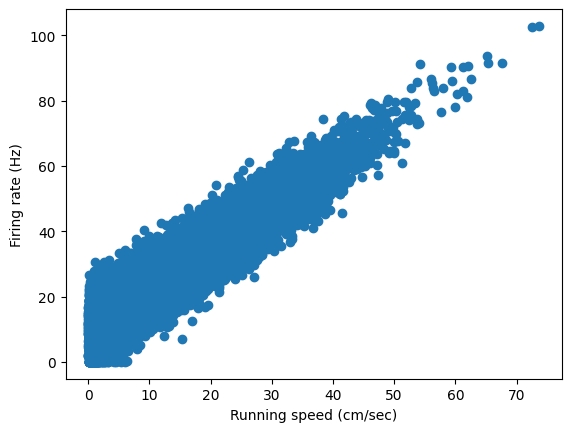

In [140]:
plt.scatter(speed,rate)
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")

### Our model

We used matrix multiplication to make predictions with our model. 

* We created a matrix with our model coefficients (1,2)
* We created a matrix with our speed data (2x27304)


$y = \theta * X$

$\begin{bmatrix} y_0 & y_1 & y_2 & y_3 \end{bmatrix} = \begin{bmatrix} b & w \end{bmatrix} * \begin{bmatrix} 1 & 1 & 1 & 1 \\ speed_0 & speed_1 & speed_2 & speed_3 \end{bmatrix} $


Each element of y results from $b*1+w*speed$, which is our linear model.

* The multiplication gives a matrix of shape (1,27304). This matrix contains the prediction of the model for 27304 data point.

In [158]:
# linear model making prediction
def model(X,theta):
    return theta@X

In [159]:
# loss function returning MSE
loss_fn = torch.nn.MSELoss()

In [160]:
# model parameters stored as a pytorch tensor. We can use pytorch autograd to calculate the gradients for us.
theta = torch.tensor([[20.0,-2.0]],requires_grad =True)
print("theta at start:", theta)

theta at start: tensor([[20., -2.]], requires_grad=True)


In [161]:
X = np.ones((2,speed.shape[0]))  # make a 2 rows array with ones in the first row and speed in the second row
X[1,:] = speed

In [162]:
# We transform our data from NumPy array to Pytorch tensors. There is no need for gradients
XTensor = torch.tensor(X,dtype=torch.float32)
rateTensor= torch.tensor(rate,dtype=torch.float32)

In [163]:
# let's run the model once to make predictions
yhat = model(XTensor,theta)

In [165]:
yhat.shape, rateTensor.unsqueeze(0).shape

(torch.Size([1, 27304]), torch.Size([1, 27304]))

In [166]:
loss = loss_fn(yhat,rateTensor.unsqueeze(0))
print("loss:",loss)

loss: tensor(1898.0017, grad_fn=<MseLossBackward0>)


In [167]:
# calculate the gradients for our model parameters (theta)
loss.backward()
print("gradients: ",theta.grad)

gradients:  tensor([[  -52.1215, -1312.6951]])


In [168]:
# We need to zero the gradients; otherwise, they accumulate
theta.grad.zero_()

tensor([[0., 0.]])

In [169]:
## training loop that will modify our parameters to minimize the loss function (MSE)
def training_loop(n_epochs, learning_rate, theta, XTensor,rateTensor):
    for epoch in range (n_epochs):

        if theta.grad is not None:
            theta.grad.zero_() 
        
        yhat = model(XTensor,theta)
        loss = loss_fn(yhat,rateTensor)
        loss.backward() # calculate gradients
        
        with torch.no_grad():
            theta -= learning_rate * theta.grad # adjust the parameters
        
        if epoch % 1000 ==0 or epoch < 10:
            print("Epoch: {}, Loss: {}, theta: {}, Gradients: {}".format(epoch,loss, theta, theta.grad))
    return theta

In [170]:
opt_theta = training_loop(n_epochs = 10000,
                          learning_rate = 0.001,
                          theta = torch.tensor([20.0,-2.0],requires_grad =True),
                          XTensor = XTensor,
                          rateTensor=rateTensor)
print(opt_theta)

Epoch: 0, Loss: 1898.001708984375, theta: tensor([20.0521, -0.6873], requires_grad=True), Gradients: tensor([  -52.1215, -1312.6951])
Epoch: 1, Loss: 580.3323974609375, theta: tensor([2.0075e+01, 4.6009e-03], requires_grad=True), Gradients: tensor([ -22.8807, -691.9058])
Epoch: 2, Loss: 214.41563415527344, theta: tensor([20.0825,  0.3694], requires_grad=True), Gradients: tensor([  -7.4774, -364.7972])
Epoch: 3, Loss: 112.75155639648438, theta: tensor([20.0818,  0.5618], requires_grad=True), Gradients: tensor([   0.6346, -192.4358])
Epoch: 4, Loss: 84.4569320678711, theta: tensor([20.0769,  0.6634], requires_grad=True), Gradients: tensor([   4.9047, -101.6143])
Epoch: 5, Loss: 76.5333480834961, theta: tensor([20.0698,  0.7172], requires_grad=True), Gradients: tensor([  7.1503, -53.7581])
Epoch: 6, Loss: 74.26587677001953, theta: tensor([20.0615,  0.7457], requires_grad=True), Gradients: tensor([  8.3292, -28.5413])
Epoch: 7, Loss: 73.56893920898438, theta: tensor([20.0525,  0.7610], req

## pytorch optimizers

There are several optimization strategies and tricks that can improve learning. There are more important when building deep neural networks. 

Let's see how to use the SGD optimizer.

In [124]:
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [132]:
learning_rate = 0.001
theta = torch.tensor([[20.0,-2.0]],requires_grad =True)
optimizer = optim.Adam([theta],lr=learning_rate)

In [133]:
## training loop that will modify our parameters to minimize the loss function (MSE)
def training_loop(n_epochs, optimizer, theta, XTensor,rateTensor):
    for epoch in range (n_epochs):

        
        yhat = model(XTensor,theta)
        loss = loss_fn(yhat,rateTensor)
        
        optimizer.zero_grad() # zero the gradients
        
        loss.backward() # calculate gradients
        
        optimizer.step() # will change the model parameters to reduce the loss
        
        
        if epoch % 1000 ==0 or epoch < 10:
            print("Epoch: {}, Loss: {}, theta: {}, Gradients: {}".format(epoch,loss, theta, theta.grad))
    return theta

In [134]:
opt_theta = training_loop(n_epochs = 20000,
                          optimizer = optimizer,
                          theta=theta,
                          XTensor = XTensor,
                          rateTensor=rateTensor)
print(opt_theta)

Epoch: 0, Loss: 1898.001708984375, theta: tensor([[20.0010, -1.9990]], requires_grad=True), Gradients: tensor([[  -52.1215, -1312.6951]])
Epoch: 1, Loss: 1896.6373291015625, theta: tensor([[20.0020, -1.9980]], requires_grad=True), Gradients: tensor([[  -52.0974, -1312.2007]])
Epoch: 2, Loss: 1895.273193359375, theta: tensor([[20.0030, -1.9970]], requires_grad=True), Gradients: tensor([[  -52.0732, -1311.7065]])
Epoch: 3, Loss: 1893.9097900390625, theta: tensor([[20.0040, -1.9960]], requires_grad=True), Gradients: tensor([[  -52.0490, -1311.2124]])
Epoch: 4, Loss: 1892.5467529296875, theta: tensor([[20.0050, -1.9950]], requires_grad=True), Gradients: tensor([[  -52.0248, -1310.7183]])
Epoch: 5, Loss: 1891.1846923828125, theta: tensor([[20.0060, -1.9940]], requires_grad=True), Gradients: tensor([[  -52.0006, -1310.2241]])
Epoch: 6, Loss: 1889.8226318359375, theta: tensor([[20.0070, -1.9930]], requires_grad=True), Gradients: tensor([[  -51.9764, -1309.7297]])
Epoch: 7, Loss: 1888.46166992

## Using a model from pytorch.nn module

Let's modify our example and instead of using our hand-made model, we will use a linear model from the pytorch library.

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

In [335]:
import torch.nn as nn
lin_model = nn.Linear(1,1)

With pytorch models, the parameters are stored in the model itself. We don't need `theta` anymore.

In [337]:
for name,p in lin_model.named_parameters():
    print(name,p)


weight Parameter containing:
tensor([[-0.2685]], requires_grad=True)
bias Parameter containing:
tensor([0.7440], requires_grad=True)


We need to modify the format our input data (speed) and our rate array. 

We don't need the `ones` anymore in the input. We want one observation per row.

In [338]:
Xt = torch.from_numpy(speed).unsqueeze(1).float()
Xt

tensor([[16.5611],
        [18.3959],
        [14.9706],
        ...,
        [26.6819],
        [26.4118],
        [26.2991]])

In [339]:
Xt.shape

torch.Size([27304, 1])

In [340]:
rateTensor = torch.from_numpy(rate).unsqueeze(1).float()
rateTensor.shape

torch.Size([27304, 1])

In [342]:
yhat = lin_model(Xt)

In [343]:
%%time
loss_fn(yhat,rateTensor)

CPU times: user 1.01 ms, sys: 0 ns, total: 1.01 ms
Wall time: 688 µs


tensor(967.0347, grad_fn=<MseLossBackward0>)

In [344]:
learning_rate = 0.001
optimizer = optim.SGD(lin_model.parameters(),lr=learning_rate)

In [345]:
## training loop that will modify our parameters to minimize the loss function (MSE)
def training_loop(n_epochs, optimizer, model, XTensor,rateTensor):
    for epoch in range (n_epochs):

        
        yhat = model(XTensor)
        
        loss = loss_fn(yhat,rateTensor)
        
        optimizer.zero_grad() # zero the gradients
        
        loss.backward() # calculate gradients
        
        optimizer.step() # will change the model parameters to reduce the loss
        
        
        if epoch % 1000 ==0 or epoch < 10:
            print("Epoch: {}, Loss: {}".format(epoch,loss))
    return

In [346]:
opt_theta = training_loop(n_epochs = 20000,
                          optimizer = optimizer,
                          model=lin_model,
                          XTensor = Xt,
                          rateTensor=rateTensor)

Epoch: 0, Loss: 967.03466796875
Epoch: 1, Loss: 314.845947265625
Epoch: 2, Loss: 133.71263122558594
Epoch: 3, Loss: 83.36662292480469
Epoch: 4, Loss: 69.33366394042969
Epoch: 5, Loss: 65.38308715820312
Epoch: 6, Loss: 64.23197937011719
Epoch: 7, Loss: 63.858238220214844
Epoch: 8, Loss: 63.700443267822266
Epoch: 9, Loss: 63.602691650390625
Epoch: 1000, Loss: 30.39214324951172
Epoch: 2000, Loss: 25.371564865112305
Epoch: 3000, Loss: 24.627561569213867
Epoch: 4000, Loss: 24.51730728149414
Epoch: 5000, Loss: 24.5009708404541
Epoch: 6000, Loss: 24.498550415039062
Epoch: 7000, Loss: 24.498191833496094
Epoch: 8000, Loss: 24.498138427734375
Epoch: 9000, Loss: 24.498130798339844
Epoch: 10000, Loss: 24.498130798339844
Epoch: 11000, Loss: 24.498130798339844
Epoch: 12000, Loss: 24.498130798339844
Epoch: 13000, Loss: 24.498130798339844
Epoch: 14000, Loss: 24.498130798339844
Epoch: 15000, Loss: 24.498130798339844
Epoch: 16000, Loss: 24.498130798339844
Epoch: 17000, Loss: 24.498130798339844
Epoch: 18

In [348]:
for p in lin_model.parameters():
    print(p)

Parameter containing:
tensor([[1.2533]], requires_grad=True)
Parameter containing:
tensor([9.9559], requires_grad=True)


# A first neural network

* Mathematical entities capable of representing complicated functions through a composition of simpler functions.
* Deep neural network have **multiple layers** between the input and output layers. 
* Each layer has several artificial neurons. 
* New data comes from the left, and calculations propagates towards the ouput layer.


<div>
<img src="../images/deep-neural-network.png" width="500"/>
</div>

***

* Our previous model had 1 input and 1 output

<img src="../images/neuron_linear.png" width="500" align="center">

* A neuron in a neural network has one more non-linear function. 

<img src="../images/artificial_neuron.png" width="500" align="center">

The non-linear function allows the model to have different slope at different values.

The non-linear function of the neuron is called the **activation function**.

Text(0.5, 1.0, 'tanh function')

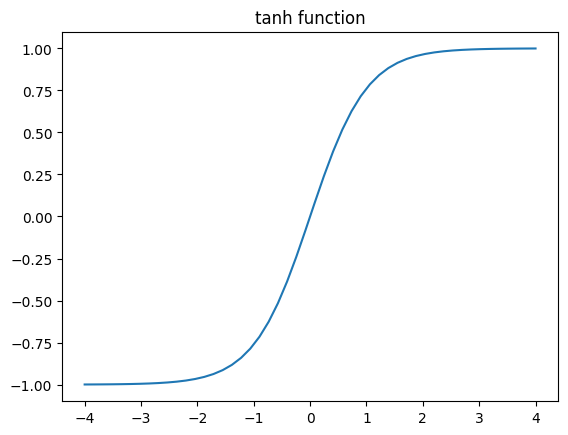

In [349]:
x = np.linspace(-4,4)
plt.plot(x, np.tanh(x))
plt.title("tanh function")

Our first neural network will predict the firing rate from the speed of the animal.

In [350]:
seq_model = nn.Sequential(nn.Linear(1,13),
                      nn.Tanh(),
                      nn.Linear(13,1))

In [351]:
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [352]:
for name, p in seq_model.named_parameters():
    print(name,p)

0.weight Parameter containing:
tensor([[-0.4817],
        [ 0.8197],
        [-0.6956],
        [-0.4323],
        [-0.0551],
        [ 0.3399],
        [-0.1226],
        [-0.6209],
        [-0.5914],
        [-0.9759],
        [ 0.4815],
        [ 0.5897],
        [-0.7522]], requires_grad=True)
0.bias Parameter containing:
tensor([-0.0966, -0.0950, -0.9690,  0.6948, -0.2624, -0.7333,  0.8339, -0.8892,
         0.9917, -0.3845,  0.6822,  0.8525,  0.7046], requires_grad=True)
2.weight Parameter containing:
tensor([[-0.0604,  0.0926,  0.0194, -0.2117, -0.2416, -0.1968,  0.1519,  0.0222,
          0.0983, -0.2504, -0.0376,  0.0842,  0.0966]], requires_grad=True)
2.bias Parameter containing:
tensor([0.0284], requires_grad=True)


In [353]:
optimizer = optim.SGD(seq_model.parameters(),lr=learning_rate)

In [354]:
opt_theta = training_loop(n_epochs = 20000,
                          optimizer = optimizer,
                          model=seq_model,
                          XTensor = Xt,
                          rateTensor=rateTensor)

Epoch: 0, Loss: 753.1209106445312
Epoch: 1, Loss: 726.9225463867188
Epoch: 2, Loss: 702.1558227539062
Epoch: 3, Loss: 677.3721923828125
Epoch: 4, Loss: 652.6217651367188
Epoch: 5, Loss: 630.4622192382812
Epoch: 6, Loss: 609.2015991210938
Epoch: 7, Loss: 588.8223266601562
Epoch: 8, Loss: 569.2978515625
Epoch: 9, Loss: 550.59912109375
Epoch: 1000, Loss: 42.504112243652344
Epoch: 2000, Loss: 44.898563385009766
Epoch: 3000, Loss: 38.15821838378906
Epoch: 4000, Loss: 35.232051849365234
Epoch: 5000, Loss: 33.694766998291016
Epoch: 6000, Loss: 32.47941589355469
Epoch: 7000, Loss: 31.42172622680664
Epoch: 8000, Loss: 30.410612106323242
Epoch: 9000, Loss: 29.27582359313965
Epoch: 10000, Loss: 28.68196678161621
Epoch: 11000, Loss: 28.210283279418945
Epoch: 12000, Loss: 27.83739471435547
Epoch: 13000, Loss: 27.54195213317871
Epoch: 14000, Loss: 27.305078506469727
Epoch: 15000, Loss: 27.110729217529297
Epoch: 16000, Loss: 26.94639778137207
Epoch: 17000, Loss: 26.802732467651367
Epoch: 18000, Loss:

In [355]:
for name, p in seq_model.named_parameters():
    print(name,p)

0.weight Parameter containing:
tensor([[-0.1626],
        [ 1.0149],
        [-0.6875],
        [-0.2973],
        [-0.2016],
        [ 0.3001],
        [-1.0620],
        [-0.4502],
        [-0.2481],
        [-1.1877],
        [ 0.0818],
        [ 0.1429],
        [ 0.1977]], requires_grad=True)
0.bias Parameter containing:
tensor([ 0.5031,  1.4245, -1.6451,  6.7377,  2.6323, -9.5947,  0.7785, -1.5991,
        10.3445, -1.5105,  0.6431,  1.5300,  2.4598], requires_grad=True)
2.weight Parameter containing:
tensor([[-5.5768,  5.4764, -5.5798, -5.0613, -5.5910,  4.8022,  0.6501, -5.5665,
         -6.5371, -5.7726,  5.6034,  5.6751, -1.3610]], requires_grad=True)
2.bias Parameter containing:
tensor([5.7305], requires_grad=True)


### Let's compare our linear model with our small neural network